<a href="https://colab.research.google.com/github/Info-TSI-Vieljeux/pourDS/blob/main/correcDSweb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Correction du deuxième DS (TSI2, 2022)

In [ ]:
!git clone https://github.com/Info-TSI-Vieljeux/pourDS

Cloning into 'pourDS'...
remote: Enumerating objects: 111, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (65/65), done.
remote: Total 111 (delta 29), reused 0 (delta 0), pack-reused 46
Receiving objects: 100% (111/111), 8.02 MiB | 16.14 MiB/s, done.
Resolving deltas: 100% (41/41), done.


Sujet adapté de l’article « [L’algorithme PageRank de Google : une promenade sur la toile](https://images.math.cnrs.fr/Comment-Google-classe-les-pages-web.html) » de Michael Eisermann.

# L’algorithme PageRank de Google


Cela fait plus de 20 ans que Google domine le marché des moteurs de recherche. Cette longévité semble indiquer une réelle pertinence des résultats fournis.
Depuis sa conception en 1998, l’algorithme de recherche de Google continue d’évoluer et la plupart des améliorations demeurent des secrets industriels. L’idée principale, par contre, est connue puisqu’elle est l’objet d’une célèbre publication de Sergueï Brin et Larry Page (les cofondateurs) : The anatomy of a large-scale hypertextual web search engine. Stanford University, 1998. Le fonctionnement de PageRank, l’algorithme au centre du moteur de recherche, y est détaillé.

##I. Une base de données du Web

Imaginons qu’il existe un registre complet de l’internet structuré sous la forme d’une base de données relationnelle. 
On supposera dans la suite que chaque nouvelle page web créée entraîne un enregistrement sur une base de données constituée des 3 tables décrites ci-dessous :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/tableDS1.png?raw=true"/>

Le contenu des trois tables pour un internet lilliputien imaginaire :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/tableDS2.png?raw=true"/>

1. Que désignent les deux colonnes dans les
trois premiers tableaux (présentant les tables) ?

> - colonne 1 : les attributs
> - colonne 2 : les domaines

2. Quel(s) attribut(s) et/ou association(s) d’attributs de la table 1 peut/peuvent-il(s) servir de clé primaire ?

> "`page`", "`site`"+"`page`", "`page`"+"`creation`",  "`site`"+"`page`"+"`creation`"

3. Écrivez une requête SQL qui permet d’obtenir les **pages** créées avant 2010 en se limitant à 3 résultats.

In [ ]:
%load_ext sql
%sql sqlite:///pourDS/DS.db

'Connected: @pourDS/DS.db'

In [ ]:
%%sql qu3 <<

SELECT page
FROM table1
WHERE creation < 2010
LIMIT 3;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu3


In [ ]:
qu3

page
b.com/index.html
b.com/1/index.html
b.com/2/index.html


4. Écrivez une requête SQL permettant de compter, pour chaque **site**, le **nombre de pages** qu’il contient (les en-têtes de la table affichée devront être « `site` » et « `nb pages` »).


In [ ]:
%%sql qu4 <<

SELECT site, COUNT(page) AS "nb pages"
FROM table1
GROUP BY site;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu4


In [ ]:
qu4

site,nb pages
a.io,3
b.com,3
c.fr,2
d.edu,1


5. Écrivez une requête SQL n’affichant que les **pages** ayant au moins 2 liens sortants ainsi que leur **nombre de liens sortants**.

In [ ]:
%%sql qu5 <<

SELECT page, COUNT(liensortant) AS nb
FROM table2
GROUP BY page
HAVING nb >= 2;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu5


In [ ]:
qu5

page,nb
a.io/1/index.html,2
a.io/index.html,2
b.com/1/index.html,3
b.com/index.html,3
c.fr/index.html,2


6. Écrivez une requête SQL qui permet d’obtenir les **sites** et les **pages** contenant un lien vers `d.edu/index.htm`.

In [ ]:
%%sql qu6 <<

SELECT table1.site, table1.page
FROM table1 JOIN table2 ON table1.page = table2.page
WHERE table2.liensortant = "d.edu/index.html";

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu6


In [ ]:
qu6

site,page
a.io,a.io/1/index.html
b.com,b.com/2/index.html
b.com,b.com/index.html


7. Écrivez une requête SQL calculant, pour chaque **page**, sa **« popularité »**, où la popularité est définie comme le nombre de liens pointant vers la page (on supposera pour simplifier que chaque page a au moins un lien pointant vers elle).

In [ ]:
%%sql qu7 <<

SELECT table1.page, COUNT(liensortant) AS popularité
FROM table1 JOIN table2 ON table1.page = table2.liensortant
GROUP BY table1.page;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu7


In [ ]:
qu7

page,popularité
a.io/1/index.html,2
a.io/2/index.html,1
a.io/index.html,1
b.com/1/index.html,1
b.com/2/index.html,3
b.com/index.html,1
c.fr/1/index.html,1
c.fr/index.html,1
d.edu/index.html,3


8. Écrivez une requête SQL qui classe, pour le mot de clé « base », les pages où il est présent, dans l’ordre décroissant de leur popularité telle que définie à la question précédente.

In [ ]:
%%sql qu8 <<

SELECT grossetable.page, popularity
FROM ((SELECT table1.page, COUNT(liensortant) AS popularity
	    FROM table1 JOIN table2 ON table1.page = table2.liensortant
              GROUP BY table1.page) AS popu
              JOIN table3 ON popu.page = table3.page) AS grossetable
WHERE grossetable.keyword = "base"
ORDER BY popularity DESC;

 * sqlite:///pourDS/DS.db
Done.
Returning data to local variable qu8


In [ ]:
qu8

page,popularity
d.edu/index.html,3
a.io/1/index.html,2
a.io/index.html,1
c.fr/1/index.html,1
a.io/2/index.html,1


Comme un tel registre centralisé n’existe pas, c’est à la charge du moteur de recherche d’explorer le web pour produire un annuaire du même type que notre base de données imaginaire.

9. Wikipedia en langue anglaise compte environ 6,5 millions d’article en octobre 2022. Estimez les tailles des trois tables si la base de données précédente était construite uniquement à partir de ces articles. Vous veillerez à expliciter vos hypothèses.

>- taille table1 :	6,5 millions /   autant d'enregistrements que de pages
>- taille table 2 : 65 millions / en supposant une dizaine de liens en moyenne par page
>- taille table 3 : 650 millions / en supposant une centaine de mots-clés en moyenne par page

Pour un mot clé donné, il y a typiquement des millions de pages correspondantes que le moteur de recherche va devoir classer.

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/bretzel.png?raw=true" width=800/>

---


##II. Graphe du Web

Profitons du peu de structure disponible : le web n’est pas une collection de textes indépendants mais un immense hypertexte où les pages se citent mutuellement.<br>
En négligeant le contenu des pages pour se concentrer sur les liens entre elles, on obtient la structure d’un graphe.

Exemple :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/pourDSmonde.png?raw=true" width=600/>

Attention, on s’autorise ici des doubles flèches $\leftrightarrow$ entre deux sommets $i$ et $j$ pour représenter à la fois un un arc $i\rightarrow j$ et un arc $j \rightarrow i$.

Dans la suite, on note $P_1,P_2,\ldots,P_n$ les pages web et $j\rightarrow i$ si la page $P_j$ cite la page $P_i$.

10. Le graphe obtenu est :
> - orienté
> - cyclique
> - non pondéré


Comment exploiter ce graphe ?<br>
L’idée de départ est de considérer qu’un lien $j\rightarrow i$ correspond à une recommandation de la part de la page $P_j$ d’aller lire la page $P_i$. Dans cette hypothèse, le lien est une sorte de vote de confiance de la page $P_j$ en faveur de l’autorité de la page $P_i$.

Présentons le graphe précédent de manière à faire apparaître une hiérarchie possible.

11. Complétez les cases laissées vierges.


<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/graphier.png?raw=true" width=600/>

Parmi les pages $P_1,P_2,P_3,P_4$, la page $P_1$ sert de référence commune et semble un bon point de départ pour chercher des informations. Même chose avec les groupes $P_9,P_{10},P_{11},P_{12}$, où $P_9$ sert de référence commune, et $P_5,P_6,P_7,P_8$, où $P_7$ est la plus citée.<br>
Et comme $P_1$ et $P_9$, déjà reconnues comme importantes, font référence à la page $P_5$, on pourrait soupçonner que la page $P_5$ contient de l’information essentielle pour l’ensemble, qu’elle est la plus pertinente.<br>
Selon ce raisonnement, un modèle de classification des pages se doit de faire apparaître cette hiérarchie. Nous allons en faire par la suite notre critère de réussite…


### A. Premier modèle : comptage naïf

Il est plausible qu’une page importante reçoive beaucoup de liens. Avec un peu de naïveté, on croira aussi la réciproque : si une page reçoit beaucoup de liens, alors elle est importante. <br>
On pourrait ainsi définir l’**importance** $\mu_i$ de la page $P_i$ comme le nombre de liens $j\rightarrow i$ :

$$\mu_i  = \sum_{j\rightarrow i}1$$

Autrement dit, $\mu_i$ est le nombre de « votes » pour la page $P_i$, où chaque vote contribue pour la même valeur 1.


12. Écrivez en python une fonction `imp` renvoyant l’ « importance » $\mu_i$ d’une page.On lui passe en paramètre le graphe du web tel que présenté ci-dessus sous la forme d’une liste d’adjacence implémentée par un dictionnaire.<br>Dans notre exemple : `web = {1:[2,3,4,5],2:[1,3], 3:[1,4],4:[1,2],5:[6,7,8],6:[1,7],7:[5],8:[7,9],9:[5,10,11,12],10:[9,11],11:[9,12],12:[9,10]}`


In [ ]:
web = {1:[2,3,4,5],
       2:[1,3],
       3:[1,4],
       4:[1,2],
       5:[6,7,8],
       6:[1,7],
       7:[5],
       8:[7,9],
       9:[5,10,11,12],
       10:[9,11],
       11:[9,12],
       12:[9,10]}

In [ ]:
def imp1(i: int, web: dict) -> int:
    mu = 0
    for j in web :
        if i in web[j] :
            mu += 1
    return mu

13. En théorie des graphes, comment appelle-t-on $\mu_i$ pour le sommet $i$ ?

> Le degré entrant

14. On a déjà calculé l’importance d’une page selon le même modèle dans la partie 1. Comment l’avions-nous alors appelée ?

> "popularité"

15. Que valent les importances suivantes dans notre exemple :

In [ ]:
print(f"mu1 = {imp1(1,web)}")
print(f"mu5 = {imp1(5,web)}")
print(f"mu7 = {imp1(7,web)}")
print(f"mu9 = {imp1(9,web)}")

mu1 = 4
mu5 = 3
mu7 = 3
mu9 = 4


Bien que cette définition de l’importance soit claire et facile à calculer, on constate sur notre exemple qu’elle ne reproduit pas la hiérarchie attendue entre les pages.<br>
Pire, ce comptage naïf est trop facile à manipuler par quiconque souhaitant gonfler artificiellement l’importance d’une de ses pages.

16. Comment ferait-il ?

> Suffit de créer plein de pages bidons avec des liens pointant vers la page dont il veut augmenter l'importance.

### B. Deuxième modèle : comptage pondéré

On peut supposer que les pages émettant beaucoup de liens sont des prescripteurs moins sélectifs. On va alors diminuer la confiance apportée à leurs recommandations.<br>
Pour diminuer leur poids, on va partager le vote de la page $P_j$ en $\ell_j$ parts égales, où $\ell_j$ désigne le nombre de liens émis par la page $P_j$. On définit ainsi une mesure plus fine de l’importance :

$$\mu_i  = \sum_{j\rightarrow i}\frac{1}{\ell_j}$$

17. Écrivez en python une fonction `imp2` retournant l’importance $\mu_i$ ainsi définie.

In [ ]:
def imp2(i: int, web: dict) -> float:
    mu = 0
    for j in web :
        if i in web[j] :
            mu += 1/len(web[j])
    return mu

18. Que valent maintenant les importances suivantes dans notre exemple :


In [ ]:
print(f"mu1 = {imp2(1,web)}")
print(f"mu5 = {imp2(5,web)}")
print(f"mu7 = {imp2(7,web)}")
print(f"mu9 = {imp2(9,web)}")

mu1 = 2.0
mu5 = 1.5
mu7 = 1.3333333333333333
mu9 = 2.0


On voit donc que la formule peine encore à reproduire la hiérarchie attendue entre les pages. Et comme avant, ce comportement est trop facile à truquer.

Un graphe **dense** est un graphe à $n$ sommets ayant $O(n)$ arêtes par sommet, alors qu’un graphe creux n’a que $O(1)$ arêtes par sommet.

19. Selon vous, le graphe du web est-il dense ou creux ?

> Le graphe du Web est **creux** car le nombre de liens sortants par page n'est pas en proportion du nombre de pages du Web.

20. Quelle est alors la complexité des fonctions `imp1` et `imp2`
 en fonction de $n$ ?

> `imp1` et `imp2` sont toutes deux linéaires ($O(n)$ pour la boucle extérieure qui parcours toutes les pages multiplié par $O(1)$ pour la boucle intérieure qui parcourt les liens). 

21. Pourquoi représenter le graphe par une liste d’adjacence plutôt que par une matrice d’adjacence. 

> La matrice d'adjacence serait remplie de zéros, autre façon de dire que le graphe est creux. Tous ces zéros représentent de la place mémoire inutile.

### C. Troisième modèle : comptage récursif

Heuristiquement, une page $P_i$ paraît importante si beaucoup de pages importantes la citent. Ceci nous mène à définir l’importance $\mu_i$ de manière récursive comme suit :

$$\mu_i  = \sum_{j  \rightarrow i}\frac{1}{\ell_j}\mu_j$$

Ici, le poids du vote $j \rightarrow i$  est proportionnel au poids $\mu_j$ de la page émettrice.
C’est facile à formuler, mais moins évident à calculer…<br>
Comme il s’agit d’un système de $n$ équations à $n$ inconnues, on peut penser à utiliser la méthode du pivot de Gauss pour le résoudre.

Pour notre exemple, la matrice augmentée représentant le système est donnée ci-dessous.

22. Complétez la valeur manquante dans la matrice.

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/matrice.png?raw=true" width=600/>

On peut vérifier que le vecteur $\mu = (2,1,1,1,3,1,2,1,2,1,1,1)^\top$ est solution du système.<br>
Enfin ! La page $P_5$ est repérée comme la plus importante, suivie de $P_1$, $P_7$ et $P_9$. C’est encourageant !


In [ ]:
def Gauss(M,recherchePivot) :
    n = len(M)                                                              
    h = k = 0
    tol = 1e-9                        
    while h < n and k < n+1 :                      
        ipivot = recherchePivot(M,h,k)           
        pivot = M[ipivot][k]
        if abs(pivot) < tol :              
            k += 1
        else :
            if h != ipivot :
                M[h],M[ipivot] = M[ipivot],M[h]  
            for j in range(k,n+1) :
                M[h][j] /= pivot                 
            for i in range(h+1,n) :
                f = M[i][k]
                for j in range(k,n+1) :
                    M[i][j] -= M[h][j] * f    
            h += 1
            k += 1

Le code de la fonction permettant de transformer la matrice précédente en matrice échelonnée est donné ci-codessus.

23. Reste à coder la fonction de recherche du pivot.<br>
On utilise ici, la **recherche du pivot partiel** :<br>
votre fonction doit, à partir d’une ligne $h$ et d’une colonne $k$ ($h$ et $k$ données en paramètre), trouver la ligne $i$ de l’élément $m_{i,k}$ de la matrice $M$ (elle aussi donnée en paramètre) de plus grande valeur absolue, pour $i$ allant de $h$ à $n$.


In [ ]:
def recherchePivotPartiel(M: list, h: int, k: int) -> int:
    ipiv, piv = h, abs(M[h][k])
    n = len(M)
    for i in range(h+1,n) :
        if abs(M[i][k]) > piv :
            ipiv, piv = i, abs(M[i][k])
    return ipiv

La fonction suivante va nous permettre de passer de la liste d'adjacence du graphe du Web au système (présenté sous la forme de sa matrice augmentée).

In [ ]:
def dictosyst(web: dict) -> list:
    n = len(web)
    M = [[0 for j in range(n+1)] for i in range(n)]
    for i in range(n) :
        M[i][i] = -1
        for j in range(n) :
            if i+1 in web[j+1] :
                M[i][j] = 1/len(web[j+1])
    return M

In [ ]:
import pandas as pd # juste pour que l'affichage soit joli

n = len(web)
M = dictosyst(web)
indices = [i for i in range(1,n+1)]
colonnes = indices + ["v"]
Mpd = pd.DataFrame(M,index=[indices],columns=colonnes)
Mpd

,1,2,3,4,5,6,7,8,9,10,11,12,v
1,-1.00,0.5,0.5,0.5,0.000000,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0
2,0.25,-1.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,0.25,0.5,-1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
4,0.25,0.0,0.5,-1.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
5,0.25,0.0,0.0,0.0,-1.000000,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0
6,0.00,0.0,0.0,0.0,0.333333,-1.0,0.0,0.0,0.00,0.0,0.0,0.0,0
7,0.00,0.0,0.0,0.0,0.333333,0.5,-1.0,0.5,0.00,0.0,0.0,0.0,0
8,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,-1.0,0.00,0.0,0.0,0.0,0
9,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,-1.00,0.5,0.5,0.5,0
10,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,-1.0,0.0,0.5,0


On obtient la matrice échelonnée suivante :

In [ ]:
Gauss(M,recherchePivotPartiel)
pd.DataFrame(M,index=indices,columns=colonnes)

,1,2,3,4,5,6,7,8,9,10,11,12,v
1,1.0,-0.5,-0.500000,-0.500000,-0.000000,-0.500000,-0.000000,-0.00,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
2,0.0,1.0,-0.142857,-0.714286,-0.000000,-0.142857,-0.000000,-0.00,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
3,0.0,0.0,1.000000,-0.727273,-0.000000,-0.272727,-0.000000,-0.00,-0.000000,-0.000000,-0.000000,-0.000000e+00,-0.0
4,0.0,0.0,0.000000,1.000000,-3.142857,0.571429,3.142857,0.00,0.785714,0.000000,0.000000,0.000000e+00,0.0
5,0.0,0.0,0.000000,0.000000,1.000000,-0.500000,-1.000000,-0.00,-0.250000,-0.000000,-0.000000,-0.000000e+00,-0.0
6,0.0,0.0,0.000000,0.000000,0.000000,1.000000,-0.400000,-0.00,-0.100000,-0.000000,-0.000000,-0.000000e+00,-0.0
7,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,-1.25,-0.375000,-0.000000,-0.000000,-0.000000e+00,-0.0
8,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.00,-0.500000,-0.000000,-0.000000,-0.000000e+00,-0.0
9,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,1.000000,-0.666667,-0.666667,-6.666667e-01,-0.0
10,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.000000,-0.200000,-8.000000e-01,-0.0


24. Parmi les 12 équations du système, combien sont-elles indépendantes ?

> **11**<br>puisque le pivot sur la 12<sup>e</sup> ligne est nul (la valeur non nulle donnée par l'algorithme correspond à l'erreur d'arrondi due au codage sur une place mémoire limitée des flottants en machine).<br>
Et c'est logique puisque le fait que $\sum_i \sum_{j\rightarrow i}\frac{1}{\ell_j} = 1$ (la somme des poids des liens sortants d'une page vaut 1) implique un lien existe entre les 12 équations. Cela se traduit par le fait que la somme des éléments sur une colonne de la matrice augmentée vaut toujours 0.

25. Quelle est la complexité de la fonction Gauss ?

> $O(n^3)$ (chaque case bleue ci-dessous est un calcul $O(1)$).
> <img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/complgauss.png?raw=true"/>

L’algorithme `PageRank` utilise une méthode plus simple à implémenter et bien plus rapide ! 


Pour développer une intuition de la méthode, imaginons un surfeur aléatoire qui se ballade sur internet en cliquant sur les liens au hasard. Comment évolue sa position ?
À titre d’exemple, supposons que notre surfeur démarre au temps $t=0$ sur la page $P_7$. Le seul lien pointe vers $P_5$, donc au temps $t=1$, le surfeur s’y retrouve avec une probabilité 1. De $P_5$ partent trois liens, donc au temps $t=2$, il se trouve sur une des 3 pages $P_6,P_7,P_8$, avec une probabilité d’$1/3$. En continuant ainsi, on obtient&nbsp;:


<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/markov1.png?raw=true" width=600/>

On observe une diffusion qui **converge** assez rapidement vers une distribution stationnaire.

Vérifions-le en partant d’une autre page, disons $P_1$ :

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/markov2.png?raw=true" width=600/>

26. Complétez la ligne correspondant à $t=2$.

Bien que la diffusion mette plus de temps, la mesure stationnaire est la même ! Elle coïncide d’ailleurs avec notre solution $\mu = (2,1,1,1,3,1,2,1,2,1,1,1)^\top$, ici divisée par 17 pour normaliser la somme à 1.
Les pages où $\mu_i$ est grande sont par le fait les plus «&nbsp;fréquentées&nbsp;» ou les plus «&nbsp;populaires&nbsp;». Dans la quête de classer les pages web, c’est encore un argument pour utiliser la mesure $\mu$ comme indicateur.


Comment formaliser cette diffusion ? Supposons qu’au temps $t$, notre surfeur aléatoire se trouve sur la page $P_j$ avec une probabilité $p_j$. La probabilité de partir de $P_j$ en suivant le lien $j\rightarrow i$ est alors $\frac{1}{\ell_j}p_j$.<br> 
La probabilité d’arriver au temps $t+1$ sur la page $P_i$ est donc&nbsp;:

$$p'_i=\sum_{j\rightarrow i}\frac{1}{\ell_j}p_j$$

Étant donné la distribution initiale $p$, la **loi de transition** ci-dessus définit la distribution $p'=T(p)$. C’est ainsi que l’on obtient la ligne $t+1$ à partir de la ligne $t$ dans nos exemples (en théorie des probabilité, cela s’appelle une **chaîne de Markov**). La **mesure stationnaire** est caractérisée par l’équation d’équilibre $\mu = T(\mu)$ qui est justement notre équation $ \mu_i  = \sum_{j\rightarrow i}\frac{1}{\ell_i}\mu_j$.

Mais il existe un obstacle à ce modèle : les **trous noirs**…

27. Trouvez la solution stationnaire (le vecteur $\mu$) dans l’exemple ci-dessous.

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/trounoir.png?raw=true" width=600/>

> $\mu = (0,0,0,0,0,0,0,0,0,0,0,0,1)^\top$

Pour échapper aux trous noirs, Google utilise un modèle plus raffiné : avec une probabilité fixée $c$, le surfeur abandonne sa page actuelle $P_j$ et recommence sur une des $n$ pages du web, choisie de manière équiprobable ; sinon, avec une probabilité $1-c$, le surfeur suit un des liens de la page $P_j$, choisi lui aussi de manière équiprobable.<br>
Cette astuce de **« téléportation »** évite de se faire piéger par une page sans issue, et garantit d’arriver n’importe où dans le graphe, indépendamment des questions de connexité.


Dans ce modèle, la transition est donnée par :

$$p'_i = \frac{c}{n}+\sum_{j\rightarrow i}\frac{1-c}{\ell_j}p_j$$

Le premier terme $\frac{c}{n}$ vient de la téléportation et le second terme de la marche aléatoire précédente.
La mesure d’équilibre vérifie donc :

$$\mu_i = \frac{c}{n}+\sum_{j\rightarrow i}\frac{1-c}{\ell_j}\mu_j$$

Le paramètre $c$ reste à calibrer. Pour $c=0$, on retrouve le modèle précédent. Pour $0≤c≤1$, la valeur $1/c$ est le nombre moyen de pages visitées, c’est-à-dire le nombre de liens suivis plus un, avant de recommencer sur une page aléatoire (processus de Bernoulli). Par exemple, le choix $c=0,15$ correspond à suivre environ 6 liens en moyenne, ce qui semble une description réaliste.


Reprenons l’exemple initial et simulons la marche aléatoire partant de la page $P_1$&nbsp;:

<img src="https://github.com/Info-TSI-Vieljeux/pourDS/blob/main/markov3.png?raw=true" width=600/>

La mesure stationnaire est vite atteinte, et la page $P_5$ arrive en tête avec $\mu_5=0,15$ avant les pages $P_1$ et $P_9$ avec $\mu_1=\mu_9=0,12$.


28. Codez un algorithme itératif permettant d’obtenir la mesure stationnaire $\mu$. Votre fonction prendra en paramètre le graphe du web sous la forme d’une liste d’adjacence implémentée par un dictionnaire et retournera la mesure stationnaire $\mu$ sous la forme d’une liste de $n$ flottants.<br>
Pour $t=0$, vous initialiserez la liste correspondant au vecteur $\mu$ avec une valeur de $c/n$ pour chaque élément.<br>
Votre implémentation se limitera à un graphe du web calqué sur le modèle de notre exemple où chaque page est désigné par un entier entre 1 et n.

In [ ]:
def PageRank(web: dict) -> list:
    n = len(web)
    c = 0.15
    mu_avant = [c/n for i in range(n)]
    mu_apres = [0 for i in range(n)]
    test = True
    while test :
        for i in range(n) :
            S = 0
            for j in web :
                if i+1 in web[j] :
                    S += (1-c)/len(web[j])*mu_avant[j-1]
            mu_apres[i] = c/n + S
        test = False
        for i in range(n) :
            if abs(mu_apres[i]-mu_avant[i])>1e-9 :
                test = True
        mu_avant[:] = mu_apres[:]
    return mu_apres

La loi de transition définit une application $T:p \mapsto p'$ qui est contractante de rapport $1-c$. Le théorème du point fixe de Banach nous assure alors que l’équation $\textstyle \mu_i = \frac{c}{n}+\sum_{j\rightarrow i}\frac{1-c}{\ell_j}\mu_j$ admet une unique solution $\mu$ vérifiant $\textstyle \sum_{i=1}^n \mu_i =1$ où $\forall i,\mu_i≥0$. Pour toute distribution de probabilité initiale, le processus de diffusion converge vers cette solution stationnaire $\mu$. La convergence est au moins aussi rapide que celle de la suite géométrique $(1-c)^n$ vers $0$.


29. De quoi la démonstration de l’existence de la solution stationnaire  permet-elle de s’assurer par rapport à l’algorithme PageRank ?

> Sa **terminaison**

30. Quelle méthode algorithmique permettant de calculer l’état d’un système au temps $t+h$ en fonction de son état au temps $t$ présente-t-elle un potentiel problème d’**instabilité numérique** ?


> La méthode d'**Euler explicite**.

Ici, pas de soucis ! Le fait que $T$ soit contractante nous assure la stabilité numérique. Les erreurs d’arrondi liées à l’usage de nombres à virgule flottante ne sont pas amplifiées dans les calculs itératifs.


---

# Compléments

Importances obtenues par `imp1` :

In [ ]:
for i in range(1,13) :
    print(f'{i:2} : {imp1(i,web)}')

 1 : 4
 2 : 2
 3 : 2
 4 : 2
 5 : 3
 6 : 1
 7 : 3
 8 : 1
 9 : 4
10 : 2
11 : 2
12 : 2


Importances obtenues par `imp2` :

In [ ]:
for i in range(1,13) :
    print(f'{i:2} : {imp2(i,web)}')

 1 : 2.0
 2 : 0.75
 3 : 0.75
 4 : 0.75
 5 : 1.5
 6 : 0.3333333333333333
 7 : 1.3333333333333333
 8 : 0.3333333333333333
 9 : 2.0
10 : 0.75
11 : 0.75
12 : 0.75


Pour trouver le vecteur solution depuis la matrice échelonée, on doit modifier un peu la fonction `substitution` par rapport au TP11 pour tenir compte du fait que certaines composantes du vecteur solution sont libres (ici, on les fixe à 1) :

In [ ]:
def substitution(M) :
    n = len(M)
    V = [0]*n
    tol = 1e-9
    for i in range(n-1,-1,-1):
        if abs(M[i][i]) > tol :
            V[i] = M[i][n]
            for j in range(i+1,n):
                V[i] -= M[i][j]*V[j]
            V[i] /= M[i][i]
        else :
            V[i] = 1 # ajouté par rapport au TP11
    return V

Importances obtenue par substitution :

In [ ]:
muGauss = substitution(M)

In [ ]:
for i in range(1,13) :
    print(f'{i:2} : {muGauss[i-1]}')

 1 : 2.0000000000000013
 2 : 1.0000000000000009
 3 : 1.0000000000000007
 4 : 1.000000000000001
 5 : 2.9999999999999996
 6 : 0.9999999999999998
 7 : 1.9999999999999996
 8 : 0.9999999999999998
 9 : 1.9999999999999996
10 : 0.9999999999999999
11 : 0.9999999999999997
12 : 1


Importances obtenue par `PageRank` :

In [ ]:
muPage = PageRank(web)

In [ ]:
for i in range(1,13) :
    print(f'{i:2} : {muPage[i-1]}')

 1 : 0.12030504554607914
 2 : 0.06619969031496217
 3 : 0.06619969031496217
 4 : 0.06619969031496217
 5 : 0.15021127469514933
 6 : 0.05505986091618707
 7 : 0.10186074244750752
 8 : 0.05505986091618707
 9 : 0.12030504554607914
10 : 0.06619969031496217
11 : 0.06619969031496217
12 : 0.06619969031496217


In [ ]:
def afficheTop5(mu: list,methode: str) -> None:
    pages = [i for i in range(1,len(mu)+1)]
    muCla = list(zip(mu,pages))
    muCla.sort(reverse=True)
    print(f"  Top 5 {methode[:8]:9} : ",end="")
    for i in range(5) :
        pi = muCla[i][1]
        print(f"{pi:4}",end="")
    print()

In [ ]:
afficheTop5(muGauss,"Gauss")
afficheTop5(muPage,"PageRank")

  Top 5 Gauss     :    5   1   9   7   4
  Top 5 PageRank  :    5   9   1   7  12


Pour afficher les importances pour chaque $t$ avec `PageRank`:

In [ ]:
def affichePageSequentiel(web) :
    n = len(web)
    c = 0.15
    mu_avant = [c/n for i in range(n)]
    mu_apres = [0 for i in range(n)]
    Mat = [mu_avant[:]]
    test = True
    while test :
        for i in range(n) :
            S = 0
            for j in web :
                if i+1 in web[j] :
                    S += (1-c)/len(web[j])*mu_avant[j-1]
            mu_apres[i] = c/n + S
        test = False
        for i in range(n) :
            if abs(mu_apres[i]-mu_avant[i])>1e-9 :
                test = True
        mu_avant[:] = mu_apres[:]
        Mat.append(mu_apres[:])
    Res = pd.DataFrame(Mat,columns=[i for i in range(1,len(web)+1)])
    return Res

In [ ]:
affichePageSequentiel(web)

,1,2,3,4,5,6,7,8,9,10,11,12
0,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500,0.012500
1,0.033750,0.020469,0.020469,0.020469,0.028437,0.016042,0.026667,0.016042,0.033750,0.020469,0.020469,0.020469
2,0.045415,0.028371,0.028371,0.028371,0.049510,0.020557,0.034193,0.020557,0.045415,0.028371,0.028371,0.028371
3,0.057410,0.034208,0.034208,0.034208,0.060865,0.026528,0.044002,0.026528,0.057410,0.034208,0.034208,0.034208
4,0.067390,0.039238,0.039238,0.039238,0.074301,0.029745,0.052294,0.029745,0.067390,0.039238,0.039238,0.039238
...,...,...,...,...,...,...,...,...,...,...,...,...
102,0.120305,0.066200,0.066200,0.066200,0.150211,0.055060,0.101861,0.055060,0.120305,0.066200,0.066200,0.066200
103,0.120305,0.066200,0.066200,0.066200,0.150211,0.055060,0.101861,0.055060,0.120305,0.066200,0.066200,0.066200
104,0.120305,0.066200,0.066200,0.066200,0.150211,0.055060,0.101861,0.055060,0.120305,0.066200,0.066200,0.066200
105,0.120305,0.066200,0.066200,0.066200,0.150211,0.055060,0.101861,0.055060,0.120305,0.066200,0.066200,0.066200


Fonction permettant de **tester si un graphe est connexe** (ça va servir plus loin pour s'assurer que les graphes de web créés sont bien connexes)&nbsp;:

In [ ]:
from collections import deque

def test_connexe(G):
    """
    retourne True si le graphe G est connexe
    """
    Vus_tous = {S : False for S in G}
    nb_domaines = 0
    for S in G :
        if not Vus_tous[S] :
            file = deque()
            file.append(S)
            Vus = {}
            while file :
                sommet = file.popleft()
                if not sommet in Vus :
                    file += G[sommet]
                    Vus[sommet] = True
                    Vus_tous[sommet] = True
            nb_domaines += 1
    return nb_domaines == 1

In [ ]:
web = {1:[2,3,4,5],
       2:[1,3],
       3:[1,4],
       4:[1,2],
       5:[6,7,8],
       6:[1,7],
       7:[5],
       8:[7,9],
       9:[5,10,11,12],
       10:[9,11],
       11:[9,12],
       12:[9,10]}

G = {1 : [2,3],
     2 : [1,3],
     3 : [1,2],
     4 : [5],
     5 : []}

In [ ]:
print(f"Le graphe web est connexe : {test_connexe(web)}")
print(f"Le graphe G est connexe : {test_connexe(G)}")

Le graphe web est connexe : True
Le graphe G est connexe : False


Les fonctions ci-dessous permettent de coder l'algorithme de `Kosaraju` (son fonctionnement ainsi que celui du tri topologique dont il dépend est décrit [dans la dernière partie de la vidéo BFS/DFS](https://www.youtube.com/watch?v=QCj7VijRkiM&t=680s) sur les parcours en largeur et en profondeur).

In [ ]:
def renverse(G) :
    Gt = {k : [] for k in G}
    for k in G :
        for s in G[k] :
            Gt[s].append(k)
    return Gt

def DFStopo(G,s,Vus,Ordo) :
    Vus[s] = True
    for sommet in G[s] :
        if sommet not in Vus :
            DFStopo(G,sommet,Vus,Ordo)
    Ordo.append(s)
    
def toposort(G) :
    Vus = {}
    Ordo = []
    for s in G :
        if s not in Vus :
            DFStopo(G,s,Vus,Ordo)
    return Ordo[::-1]

def DFS_SCC(G,s,Vus,SCC) :
    Vus[s] = True
    SCC[-1].append(s)
    for sommet in G[s] :
        if sommet not in Vus :
            DFS_SCC(G,sommet,Vus,SCC)

def Kosaraju(G) :
    Gt = renverse(G)
    Ordo = toposort(Gt)
    Vus = {}
    SCC = []
    for s in Ordo :
        if s not in Vus :
            SCC.append([])
            DFS_SCC(G,s,Vus,SCC)
    return SCC[::-1]

`Kosaraju` permet de décomposer un graphe en ses **composantes fortement connexes** (depuis chaque sommet d'une composante fortement connexe, on peut atteindre tous les autres).<br>
Si le graphe contient plus d'une composante, on aura un trou noir et un `PageRank` sans téléportation tombera dedans !

In [ ]:
def PageRankSansTeleport(web: dict) -> list:
    n = len(web)
    mu_avant = [1/n for i in range(n)]
    mu_apres = [0 for i in range(n)]
    test = True
    while test :
        for i in range(n) :
            S = 0
            for j in web :
                if i+1 in web[j] :
                    S += 1/len(web[j])*mu_avant[j-1]
            mu_apres[i] = S
        test = False
        for i in range(n) :
            if abs(mu_apres[i]-mu_avant[i])>1e-9 :
                test = True
        mu_avant[:] = mu_apres[:]
    return mu_apres

Plaçons nous dans la situation de la question 27 :

In [ ]:
web[12].append(13)
web[13]=[13]

In [ ]:
SCC = Kosaraju(web)
print(f"nombre de domaines simplement connexes : {len(SCC)}")
for i,dom in enumerate(SCC,1) :
    print(f"domaine {i} : {dom}")

nombre de domaines simplement connexes : 2
domaine 1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
domaine 2 : [13]


In [ ]:
mu = PageRankSansTeleport(web)
for i in range(1,len(web)+1) :
    print(f'{i:2} : {mu[i-1]}')

 1 : 1.0614044627407598e-08
 2 : 5.453091673778871e-09
 3 : 5.453091673778871e-09
 4 : 5.453091673778871e-09
 5 : 1.3569298429694852e-08
 6 : 4.584500893582123e-09
 7 : 9.23123673305498e-09
 8 : 4.584500893582123e-09
 9 : 6.011253537391536e-09
10 : 2.517067709334747e-09
11 : 2.7988327363452337e-09
12 : 2.941627740611952e-09
13 : 0.9999999267883614


In [ ]:
def PageRankSansTeleportSequenciel(web: dict) -> list:
    n = len(web)
    mu_avant = [1/n for i in range(n)]
    mu_apres = [0 for i in range(n)]
    Mat = [mu_avant[:]]
    test = True
    while test :
        for i in range(n) :
            S = 0
            for j in web :
                if i+1 in web[j] :
                    S += 1/len(web[j])*mu_avant[j-1]
            mu_apres[i] = S
        test = False
        for i in range(n) :
            if abs(mu_apres[i]-mu_avant[i])>1e-9 :
                test = True
        mu_avant[:] = mu_apres[:]
        Mat.append(mu_apres[:])
    Res = pd.DataFrame(Mat,columns=[i for i in range(1,len(web)+1)])
    return Res

In [ ]:
PageRankSansTeleportSequenciel(web)

,1,2,3,4,5,6,7,8,9,10,11,12,13
0,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,7.692308e-02,0.076923
1,1.538462e-01,5.769231e-02,5.769231e-02,5.769231e-02,1.153846e-01,2.564103e-02,1.025641e-01,2.564103e-02,1.410256e-01,4.487179e-02,5.769231e-02,5.769231e-02,0.102564
2,9.935897e-02,6.730769e-02,6.730769e-02,6.730769e-02,1.762821e-01,3.846154e-02,6.410256e-02,3.846154e-02,8.333333e-02,5.448718e-02,5.769231e-02,6.410256e-02,0.121795
3,1.201923e-01,5.849359e-02,5.849359e-02,5.849359e-02,1.097756e-01,5.876068e-02,9.722222e-02,5.876068e-02,9.668803e-02,4.220085e-02,4.807692e-02,4.967949e-02,0.143162
4,1.171207e-01,5.929487e-02,5.929487e-02,5.929487e-02,1.514423e-01,3.659188e-02,9.535256e-02,3.659188e-02,9.107906e-02,4.073184e-02,4.527244e-02,4.821047e-02,0.159722
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1203,1.120223e-08,5.755280e-09,5.755280e-09,5.755280e-09,1.432126e-08,4.838556e-09,9.742795e-09,4.838556e-09,6.344373e-09,2.656554e-09,2.953933e-09,3.104641e-09,1.000000
1204,1.105220e-08,5.678198e-09,5.678198e-09,5.678198e-09,1.412945e-08,4.773752e-09,9.612308e-09,4.773752e-09,6.259402e-09,2.620974e-09,2.914370e-09,3.063060e-09,1.000000
1205,1.090417e-08,5.602149e-09,5.602149e-09,5.602149e-09,1.394021e-08,4.709816e-09,9.483567e-09,4.709816e-09,6.175568e-09,2.585870e-09,2.875337e-09,3.022035e-09,1.000000
1206,1.075813e-08,5.527118e-09,5.527118e-09,5.527118e-09,1.375350e-08,4.646736e-09,9.356551e-09,4.646736e-09,6.092857e-09,2.551237e-09,2.836827e-09,2.981561e-09,1.000000


Pour vérifier le rang d'une matrice :

In [ ]:
web = {1:[2,3,4,5],
       2:[1,3],
       3:[1,4],
       4:[1,2],
       5:[6,7,8],
       6:[1,7],
       7:[5],
       8:[7,9],
       9:[5,10,11,12],
       10:[9,11],
       11:[9,12],
       12:[9,10]}
n = len(web)
M = dictosyst(web)
indices = [i for i in range(1,n+1)]
colonnes = indices + ["v"]
Mpd = pd.DataFrame(M,index=[indices],columns=colonnes)
Mpd

,1,2,3,4,5,6,7,8,9,10,11,12,v
1,-1.00,0.5,0.5,0.5,0.000000,0.5,0.0,0.0,0.00,0.0,0.0,0.0,0
2,0.25,-1.0,0.0,0.5,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
3,0.25,0.5,-1.0,0.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
4,0.25,0.0,0.5,-1.0,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0
5,0.25,0.0,0.0,0.0,-1.000000,0.0,1.0,0.0,0.25,0.0,0.0,0.0,0
6,0.00,0.0,0.0,0.0,0.333333,-1.0,0.0,0.0,0.00,0.0,0.0,0.0,0
7,0.00,0.0,0.0,0.0,0.333333,0.5,-1.0,0.5,0.00,0.0,0.0,0.0,0
8,0.00,0.0,0.0,0.0,0.333333,0.0,0.0,-1.0,0.00,0.0,0.0,0.0,0
9,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.5,-1.00,0.5,0.5,0.5,0
10,0.00,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.25,-1.0,0.0,0.5,0


In [ ]:
import numpy as np

print(f"rang de la matrice : {np.linalg.matrix_rank(M)}")

rang de la matrice : 11


Fonction permettant de créer un graphe connexe de taille $n$ avec un nombre de liens variant aléatoirement entre deux valeurs.

In [ ]:
from random import randint
def fabweb(n: int,nbliens: tuple) -> dict:
    test = True
    # Tant que pas connexe, on recommence
    while test :
        web = {}
        for i in range(1,n+1) :
            liens = []
            for j in range(randint(*nbliens)) :
                x = randint(1,n)
                if x not in liens and x != i :
                    liens.append(x)
            web[i] = liens
        test = test_connexe(web)
    return web

On augmente `PageRank` d'un compteur d'étapes :

In [ ]:
def PageRankEtapes(web) :
    n = len(web)
    c = 0.15
    compt = 0
    mu_avant = [c/n for i in range(n)]
    mu_apres = [0 for i in range(n)]
    test = True
    while test :
        for i in range(n) :
            S = 0
            for j in web :
                if i+1 in web[j] :
                    S += (1-c)/len(web[j])*mu_avant[j-1]
            mu_apres[i] = c/n + S
        test = False
        for i in range(n) :
            if abs(mu_apres[i]-mu_avant[i])>1e-9 :
                test = True
        mu_avant[:] = mu_apres[:]
        compt += 1
    return mu_apres, compt


Comparaison de l'obtention de $\mu$ avec `Gauss` et avec `PageRank` :

In [ ]:
from time import time
import matplotlib.pyplot as plt
plt.style.use('seaborn')
plt.rcParams['figure.figsize'] = (15, 10)

n = 75
  Top 5 Gauss     :   14   1  20  56  31
  Top 5 PageRank  :   14   1  20  56  31
  nombre d'étapes avant convergence : 94
n = 150
  Top 5 Gauss     :   42 141  46  88  11
  Top 5 PageRank  :   42 141  46  88  11
  nombre d'étapes avant convergence : 90
n = 225
  Top 5 Gauss     :  169  36 212  72 223
  Top 5 PageRank  :  169  36 212 223  72
  nombre d'étapes avant convergence : 88
n = 300
  Top 5 Gauss     :  288  79 160 184  86
  Top 5 PageRank  :  288  79 160 239 184
  nombre d'étapes avant convergence : 87
n = 375
  Top 5 Gauss     :  125   2 127 157 281
  Top 5 PageRank  :  125   2 127 157 281
  nombre d'étapes avant convergence : 85
n = 450
  Top 5 Gauss     :  445   2 308 304 425
  Top 5 PageRank  :  445   2 308 425 406
  nombre d'étapes avant convergence : 85
n = 525
  Top 5 Gauss     :   93 128 163 355  24
  Top 5 PageRank  :   93 128 163  29 355
  nombre d'étapes avant convergence : 83
n = 600
  Top 5 Gauss     :  532 359  34 309 425
  Top 5 PageRank  :  532 359  34 30

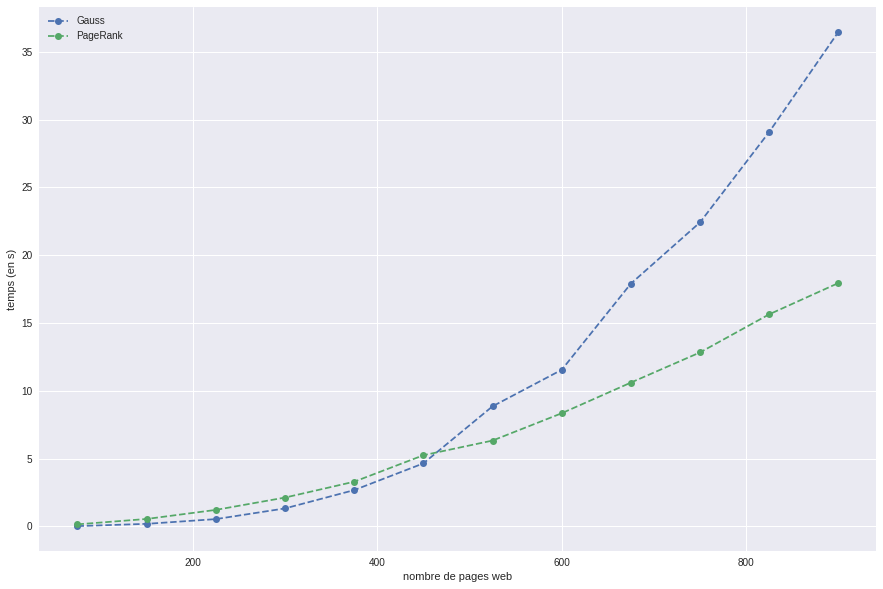

In [ ]:
Tailles = [75*i for i in range(1,13)]
Tgauss, Tpage = [], []
for t in Tailles :
    print(f"n = {t}")
    grosweb = fabweb(t,(5,15))
    M = dictosyst(grosweb)
    start1 = time()
    Gauss(M,recherchePivotPartiel)
    muGauss = substitution(M)
    stop1 = time()
    Tgauss.append(stop1-start1)
    afficheTop5(muGauss,"Gauss")
    start2 = time()
    muPage, nbetapes = PageRankEtapes(grosweb)
    stop2 = time()
    Tpage.append(stop2-start2)
    afficheTop5(muPage,"PageRank")
    print(f"  nombre d'étapes avant convergence : {nbetapes}")
plt.plot(Tailles,Tgauss,"o--",label="Gauss")
plt.plot(Tailles,Tpage,"o--",label="PageRank")
plt.xlabel("nombre de pages web")
plt.ylabel("temps (en s)")
plt.legend()

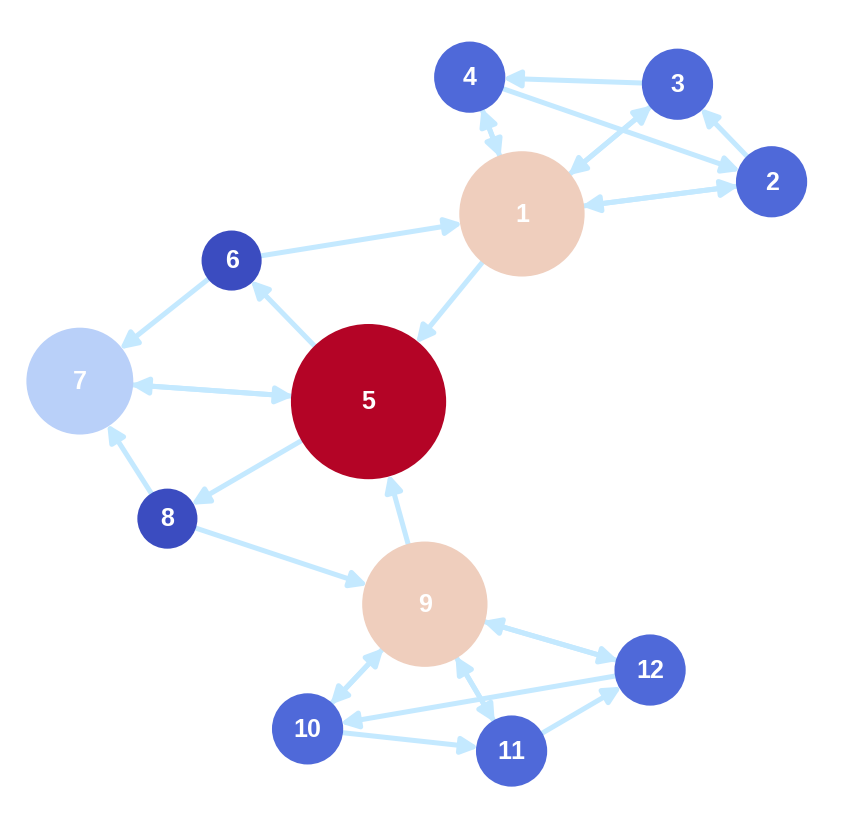

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15),frameon=False)
ax.axis('off')
muPage = PageRank(web)
for i in range(len(muPage)) :
    muPage[i] *= 1000
    muPage[i] **= 2

G = nx.DiGraph(web)

options = {"font_size": 25,
            "font_weight":"bold",
            "edge_color": "#C4E9FF",
            "node_size": muPage,
            "node_color": muPage,
            "width":5,
            "arrowsize":35, 
            "cmap" : plt.cm.coolwarm,
            "with_labels": True,
            "font_color": "white",
            "linewidths": 5,
          }

pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,ax=ax,**options)
#fig.savefig("petitgr.png",transparent=True,dpi=200,bbox_inches='tight',pad_inches=0)

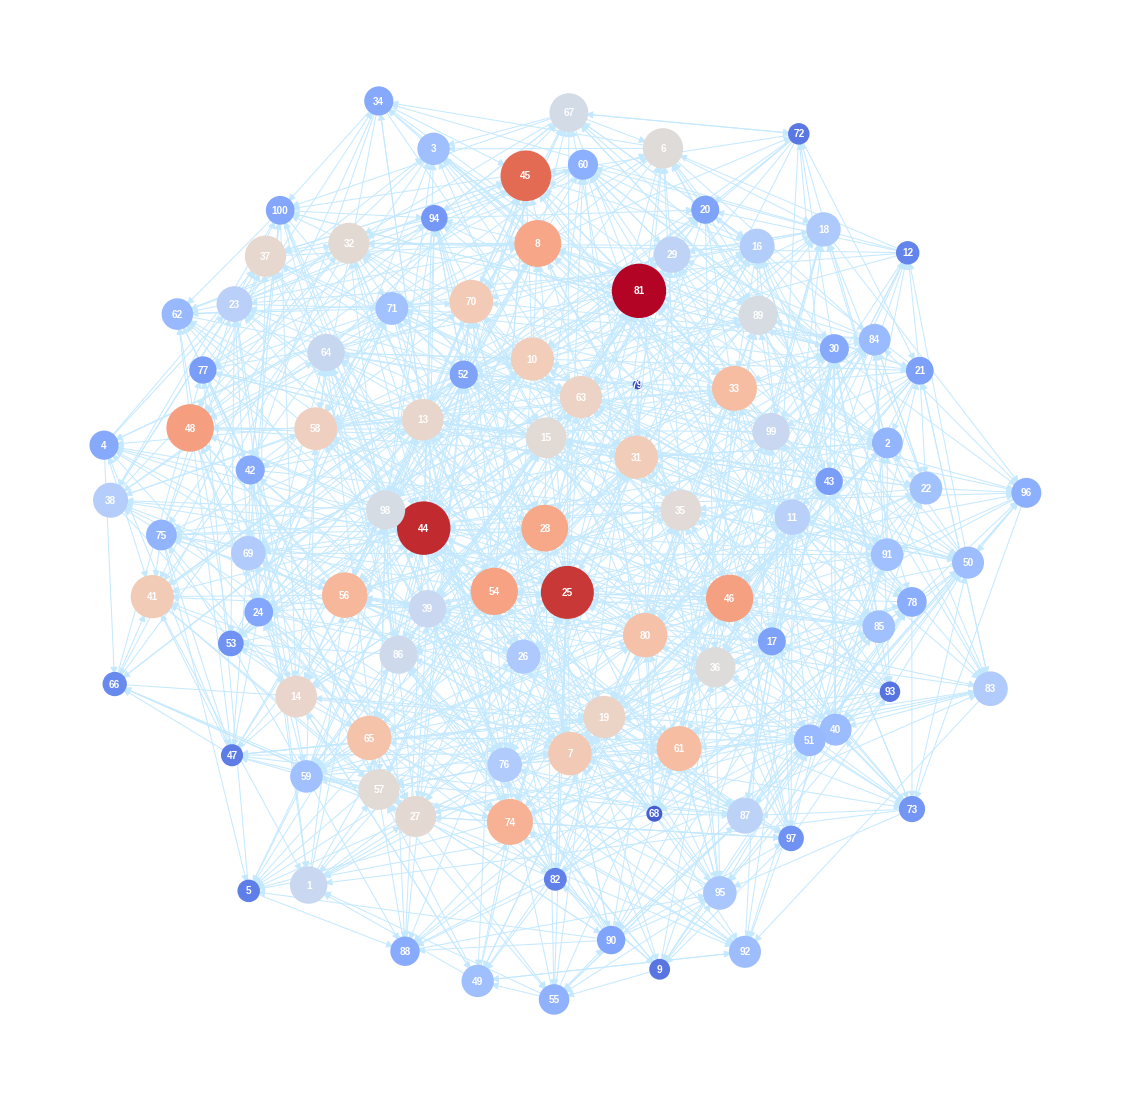

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(20,20),frameon=False)
ax.axis('off')
grosweb = fabweb(100,(5,15))
muPage = PageRank(grosweb)
for i in range(len(muPage)) :
    muPage[i] *= 3000
    muPage[i] **= 2

G = nx.DiGraph(grosweb)

options = {"font_size": 10,
            "font_weight":"bold",
            "edge_color": "#C4E9FF",
            "arrowsize":15, 
            "node_size": muPage,
            "node_color": muPage,
            "cmap" : plt.cm.coolwarm,
            "with_labels": True,
            "font_color": "white",
            "linewidths": 5,
          }

pos = nx.kamada_kawai_layout(G)
nx.draw(G,pos=pos,ax=ax,**options)
#fig.savefig("joligr.png",transparent=True,dpi=200,bbox_inches='tight',pad_inches=0)

In [ ]:
afficheTop5(muPage,"PageRank")

  Top 5 PageRank  :   81  44  25  45  48
